# Experiment 2
Data Cleaning and Preprocessing:  

● Handle missing values by imputing them with mean, median, or mode.  
Reason out which is more suitable (mean, median or mode) for your dataset and which is not  

● Removing outliers based on a specific threshold.  
Give reasons for your choice of threshold. What do the outliers in your dataset tell you?  

● Transform variables using log transformation or standardization.  
What possibly can go wrong when you do not standardize your data? What are the reasons for using log transformation on your variables and when should you definitely use it?  

● Remove duplicate records from a data frame.  
In case your dataset does not have a exact duplicate rows, can you reason about strategies for identifying and deduplicating your dataset based on a subset of features?  

● Standardize date formats across your dataset  
Is there a certain date-format that you would prefer? why?

In [81]:
import numpy as np
import pandas as pd
# read csv file
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [82]:
# drop Sr No column and remarks column
df.drop(['Remarks','Sr No'],axis=1,inplace=True)
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [83]:
# how many unique values in subvertical
df['SubVertical'].nunique()
df.drop('SubVertical',axis=1,inplace=True)
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [105]:
# show unique values in city column
print(df['City  Location'].nunique())
df['City  Location'].unique()

66


array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'Multiple Cities',
       'Amritsar', 'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad',
       'Burnsville', 'Menlo Park', 'Gurugram', 'Palo Alto',
       'Santa Monica', 'Singapore', 'Taramani', 'Andheri', 'Chembur',
       'Nairobi', 'Haryana', 'New York', 'Karnataka', 'Bhopal', 'Jaipur',
       'Nagpur', 'Indore', 'California', 'India', 'Ahmedabad', 'Rourkela',
       'Srinagar', 'Bhubaneswar', 'Kolkata', 'Coimbatore', 'Udaipur', '',
       'Surat', 'Goa', 'Uttar Pradesh', 'Gaya', 'Vadodara', 'Missourie',
       'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Agra', 'Hubli',
       'Kerala', 'Kozhikode', 'USA', 'Siliguri', 'Lucknow', 'Kanpur',
       'London', 'Varanasi', 'Jodhpur', 'Boston', 'Belgaum'], dtype=object)

In [104]:
# replace Bangalore with Bengaluru even if it is in middle of string
df['City  Location'] = df['City  Location'].str.replace(r'Bangalore', 'Bengaluru', regex=True)
df['City  Location'] = df['City  Location'].str.replace(r'Bhubneswar', 'Bhubaneswar', regex=True)
df['City  Location'] = df['City  Location'].str.replace(r'Kolkatta', 'Kolkata', regex=True)
df['City  Location'] = df['City  Location'].str.replace(r'Nw Delhi', 'New Delhi', regex=True)
df['City  Location'] = df['City  Location'].str.replace(r'\bUS\b', 'USA', regex=True)
df['City  Location'] = df['City  Location'].str.replace(r'\\\\xc2\\\\xa0', '', regex=True)
df['City  Location'] = df['City  Location'].fillna('')  # Fill NaN values with an empty string
df.loc[df['City  Location'].str.contains('/'), 'City  Location'] = 'Multiple Cities'
df.loc[df['City  Location'].str.contains('&'), 'City  Location'] = 'Multiple Cities'
df.loc[df['City  Location'].str.contains('and'), 'City  Location'] = 'Multiple Cities'
df.loc[df['City  Location'].str.contains(','), 'City  Location'] = 'Multiple Cities'
df['City  Location'] = df['City  Location'].replace({'Ahemadabad': 'Ahmedabad', 'Ahemdabad': 'Ahmedabad'})


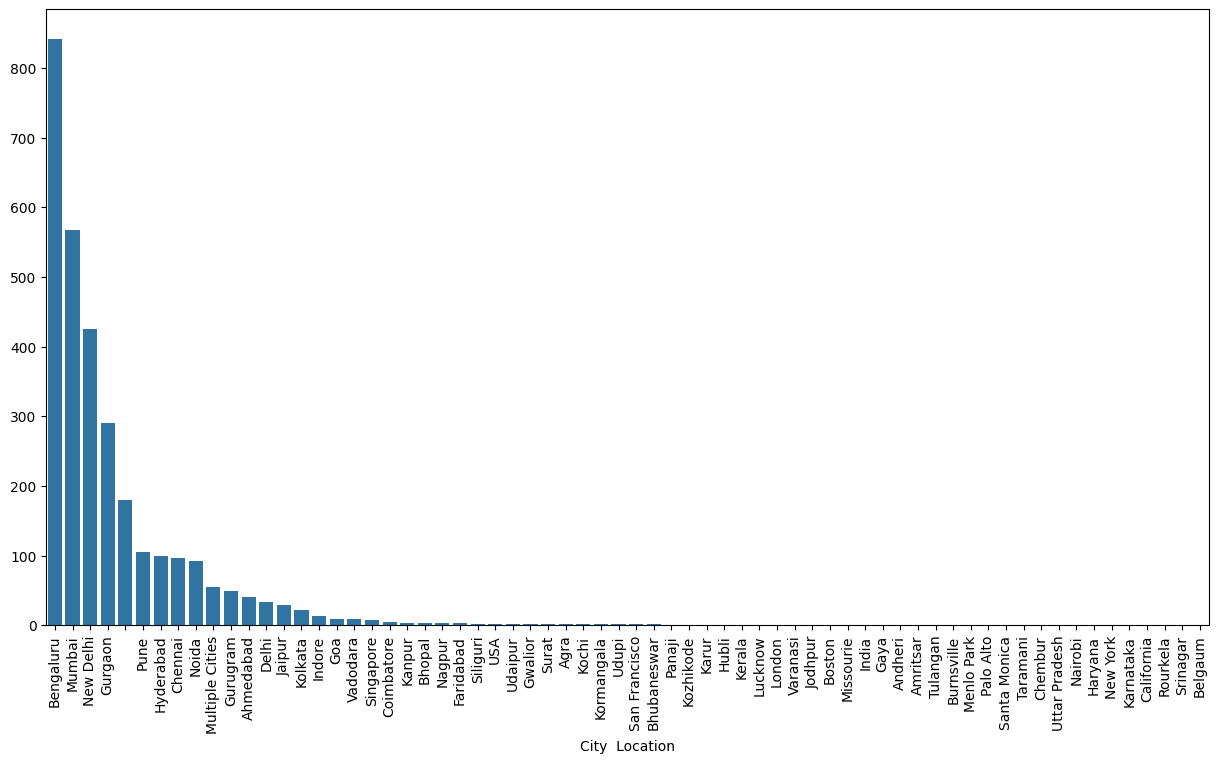

In [106]:
# print graph for cities
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(x=df['City  Location'].value_counts().index,y=df['City  Location'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [86]:
#process columns with string values without sklearn, keep the original data frame
# df_string = df.select_dtypes(include=['object'])
# df_string = df_string.apply(lambda x: pd.factorize(x)[0])
# df[df_string.columns] = df_string
# df.head()

In [87]:
# normalize the data without sklearn
# df = (df - df.min()) / (df.max() - df.min())
# df.head()

In [88]:
df.tail()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
3039,29/01/2015,Printvenue,NaN,,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,29/01/2015,Graphene,NaN,,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,30/01/2015,Mad Street Den,NaN,,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,30/01/2015,Simplotel,NaN,,MakeMyTrip,Private Equity,NaN
3043,31/01/2015,couponmachine.in,NaN,,UK based Group of Angel Investors,Seed Funding,"1,40,000"
